# Converts the pytorch mobilenet model to onnx


This notebook is dependant on step 1 notebook being completed

### Install these dependencies

apt-get update
apt-get install ffmpeg libsm6 libxext6  -y

In [1]:
# the Pytorch libraries
# Import into this kernel

!pip install opencv-python
!pip install onnx
!pip install onnxruntime
!pip install torchvision
!pip install torch

import sys
!{sys.executable} -m pip install torch

sys.path.append('..')

import torch
import torch.onnx 
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torchvision.transforms
import pickle
import os
import numpy as np



### Initialize some Vars

Initialize the COCO Classes, meaning the classificaitons found on the images and the default width and height all images are resized to

In [2]:
from CVDemoUtils import CVDemo

# The size the image will be resized to
width = 640
height = 480

# Only objects that have a confidence > confidence_target will be displayed on the image
confidence_target = 0.75

cvDemo = CVDemo()
cvDemo.COCO_CLASSES_PATH = "../models/coco_classes.pickle"


### Load the Pytorch Resnet Model, Convert to Onnx

Here we will load the pytorch model using the provided sample image as input to define the input shapes and convert the model to onnx and save using the model name + ".onnx"


In [3]:
sampleInputImagePath = '../data/images/input/example/example_01.jpg'
pytorchSavedModel = "../models/mobilenet.pt"
cvDemo.loadPytorchAndConvertToOnnx(pytorchSavedModel,sampleInputImagePath, width, height)  


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:3908: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (torch.floor((input.size(i + 2).float() * torch.tensor(scale_factors[i], dtype=torch.float32)).float()))
/opt/conda/lib/python3.9/site-packages/torchvision/ops/boxes.py:157: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes_x = torch.min(boxes_x, torch.tensor(width, dtype=boxes.dtype, device=boxes.device))
/opt/conda/lib/python3.9/site-packages/torchvision/ops/boxes.py:159: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes

### Test the Onnx Model

Next we will test the saved onnx model to verify the results match the results from detecting and classifying the image with the pytorch model


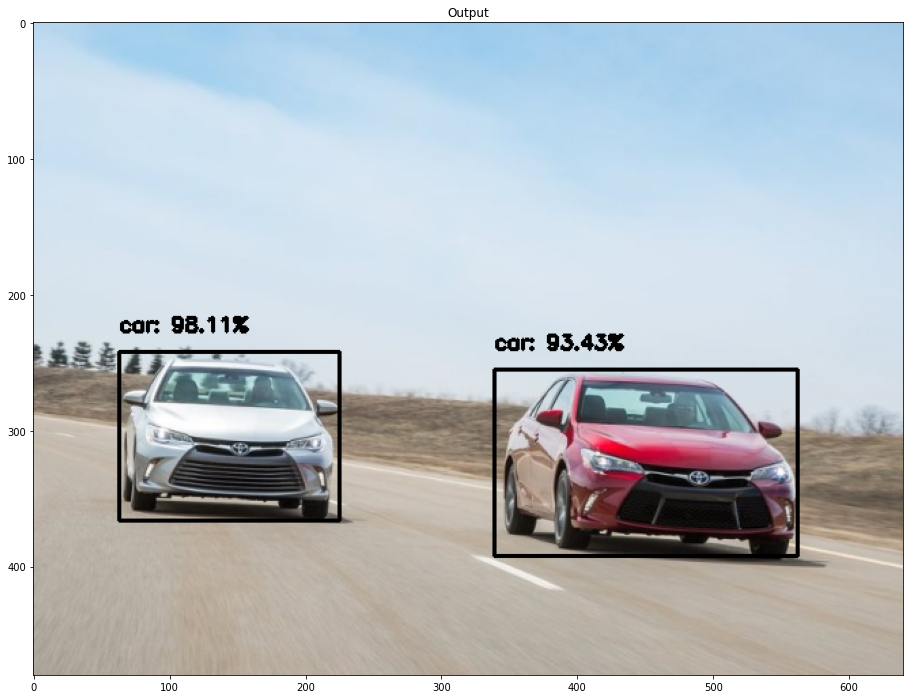

In [4]:

sampleInputImage = '../data/images/input/example/example_01.jpg'

cvDemo.detectAndClassifyObjectsWithOnnxModel(sampleInputImage, '../models/mobilenet.pt.onnx', width, height, confidence_target)
 